## Problem 1

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def costfunction(X,y,theta):

    m = np.size(y)    
    #Cost function in vectorized form
    h = np.dot(X , theta)
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;

In [44]:
from scipy.stats import truncnorm

def get_truncated_normal(mean, sd, low, upp):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [45]:
X = get_truncated_normal(mean=0, sd=0.1, low=-4, upp=4)
x=X.rvs([400,2])

#### Using given linear equation $ y= 2x_1 + 3x_2 + \epsilon $ 

In [46]:
y=np.zeros(400).reshape((400,1))
for i in range(400):
    y[i]=2*x[i][0]+3*x[i][1]

#### We use squared error as loss function 
### $ J = \frac{1}{2n} \sum_{i=0}^{n}  (y_{i}- mx_{i})^2 $   

where y is output  and $ m_1 $ and $ m_2  $ are two parameters.

#### To find  $ \eta_{opt} $ we find eigen value s $ \lambda $ of Hessian of input matrix and choose $ \lambda_{max}  $

 $ \nabla^{2}f(w)= 2*X^{T}X $
 
 Ref: https://www.cs.ubc.ca/~schmidtm/Courses/Notes/linearQuadraticGradients.pdf

In [53]:
from numpy import linalg as LA
Mat= 2*np.dot(x.transpose(),x)
w, v = LA.eig(Mat)
w

array([7.97587998, 9.21731391])

#### We choose $ \eta_{opt} = 1/9.2173 $

In [101]:
def linear_regression(X, y,learning_rate=0.01):
    epochs=2000
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)  
    N = float(len(y))
    err=np.array([])
    error=10
    i=0
    m_current=np.array([-3,-3])
    m_current=m_current.reshape((2,1))
    while error > 0.001:
        i+=1
        iter_x = np.append(iter_x,m_current[0])
        iter_y = np.append(iter_y,m_current[1])
        iter_count = np.append(iter_count ,i)  

        y_current = np.dot(X,m_current)
        #print('pred shape',y_current.shape)
        cost = (sum(data**2 for data in (y-y_current)) / N)[0]
        err=np.append(err,cost)
        print('MSE:',cost)
        error=cost
        m_gradient = (1/N)*(np.dot(X.transpose(),(np.dot(X,m_current)))- np.dot(X.transpose(),y))
        m_current = m_current - (learning_rate * m_gradient)
    return m_current, cost,ep,err,iter_x,iter_y,iter_count

In [102]:
alpha_opt=1/9.2173
weights,cost,ep,err,iter_x,iter_y,iter_count=linear_regression(x,y,alpha_opt)
err,iter_count[-1]

MSE: 0.7017775581314405
MSE: 0.7000264609961139
MSE: 0.698279734003142
MSE: 0.6965373662445138
MSE: 0.6947993468394471
MSE: 0.6930656649343208
MSE: 0.6913363097026101
MSE: 0.689611270344817
MSE: 0.6878905360884013
MSE: 0.6861740961877167
MSE: 0.6844619399239403
MSE: 0.6827540566050091
MSE: 0.6810504355655479
MSE: 0.6793510661668095
MSE: 0.6776559377966024
MSE: 0.6759650398692273
MSE: 0.6742783618254115
MSE: 0.6725958931322406
MSE: 0.670917623283095
MSE: 0.6692435417975817
MSE: 0.6675736382214726
MSE: 0.6659079021266345
MSE: 0.664246323110968
MSE: 0.6625888907983404
MSE: 0.660935594838522
MSE: 0.6592864249071191
MSE: 0.6576413707055134
MSE: 0.6560004219607934
MSE: 0.6543635684256934
MSE: 0.6527307998785282
MSE: 0.6511021061231288
MSE: 0.64947747698878
MSE: 0.6478569023301559
MSE: 0.646240372027256
MSE: 0.6446278759853443
MSE: 0.643019404134882
MSE: 0.641414946431469
MSE: 0.6398144928557814
MSE: 0.6382180334135015
MSE: 0.636625558135266
MSE: 0.6350370570765949
MSE: 0.6334525203178355
MSE

MSE: 0.20946318291944746
MSE: 0.2089406417206092
MSE: 0.20841940435162556
MSE: 0.20789946755864847
MSE: 0.20738082809595146
MSE: 0.20686348272590918
MSE: 0.20634742821897817
MSE: 0.20583266135367442
MSE: 0.20531917891655585
MSE: 0.20480697770220072
MSE: 0.20429605451318789
MSE: 0.2037864061600769
MSE: 0.20327802946138818
MSE: 0.20277092124358279
MSE: 0.20226507834104357
MSE: 0.20176049759605416
MSE: 0.20125717585877934
MSE: 0.2007551099872469
MSE: 0.2002542968473262
MSE: 0.19975473331270888
MSE: 0.19925641626489068
MSE: 0.198759342593151
MSE: 0.19826350919453253
MSE: 0.19776891297382432
MSE: 0.1972755508435396
MSE: 0.19678341972389815
MSE: 0.19629251654280744
MSE: 0.19580283823584232
MSE: 0.19531438174622648
MSE: 0.19482714402481333
MSE: 0.1943411220300666
MSE: 0.1938563127280412
MSE: 0.19337271309236578
MSE: 0.19289032010422122
MSE: 0.1924091307523247
MSE: 0.19192914203290884
MSE: 0.19145035094970356
MSE: 0.1909727545139171
MSE: 0.1904963497442175
MSE: 0.19002113366671483
MSE: 0.18954

MSE: 0.09141002123405265
MSE: 0.0911820238646857
MSE: 0.09095459530050648
MSE: 0.09072773412218918
MSE: 0.09050143891395072
MSE: 0.09027570826354085
MSE: 0.0900505407622338
MSE: 0.08982593500482018
MSE: 0.08960188958959721
MSE: 0.08937840311836004
MSE: 0.08915547419639383
MSE: 0.08893310143246425
MSE: 0.08871128343880905
MSE: 0.08849001883112928
MSE: 0.08826930622858123
MSE: 0.08804914425376685
MSE: 0.08782953153272588
MSE: 0.08761046669492703
MSE: 0.08739194837325945
MSE: 0.08717397520402403
MSE: 0.08695654582692501
MSE: 0.08673965888506183
MSE: 0.08652331302491988
MSE: 0.08630750689636278
MSE: 0.08609223915262362
MSE: 0.08587750845029635
MSE: 0.08566331344932791
MSE: 0.08544965281300952
MSE: 0.08523652520796833
MSE: 0.08502392930415917
MSE: 0.08481186377485617
MSE: 0.08460032729664496
MSE: 0.08438931854941313
MSE: 0.08417883621634363
MSE: 0.08396887898390526
MSE: 0.08375944554184538
MSE: 0.08355053458318096
MSE: 0.08334214480419082
MSE: 0.08313427490440763
MSE: 0.08292692358660934
MS

MSE: 0.031709420750771704
MSE: 0.03163035048351663
MSE: 0.031551477436020464
MSE: 0.03147280111626047
MSE: 0.03139432103344168
MSE: 0.03131603669799374
MSE: 0.03123794762156792
MSE: 0.031160053317034128
MSE: 0.031082353298477652
MSE: 0.03100484708119643
MSE: 0.030927534181697736
MSE: 0.030850414117695454
MSE: 0.03077348640810669
MSE: 0.03069675057304915
MSE: 0.03062020613383787
MSE: 0.030543852612982366
MSE: 0.030467689534183738
MSE: 0.03039171642233139
MSE: 0.030315932803500322
MSE: 0.030240338204948137
MSE: 0.03016493215511209
MSE: 0.030089714183606044
MSE: 0.030014683821217497
MSE: 0.029939840599905
MSE: 0.02986518405279477
MSE: 0.029790713714178154
MSE: 0.029716429119508447
MSE: 0.029642329805398163
MSE: 0.029568415309616024
MSE: 0.029494685171084223
MSE: 0.02942113892987539
MSE: 0.029347776127209912
MSE: 0.02927459630545278
MSE: 0.02920159900811095
MSE: 0.029128783779830494
MSE: 0.029056150166393686
MSE: 0.02898369771471617
MSE: 0.02891142597284412
MSE: 0.028839334489951504
MSE: 0

MSE: 0.013947340423878695
MSE: 0.013912569297165965
MSE: 0.013877884880865223
MSE: 0.013843286958688474
MSE: 0.013808775314887358
MSE: 0.013774349734251734
MSE: 0.013740010002108444
MSE: 0.013705755904319905
MSE: 0.013671587227282766
MSE: 0.013637503757926623
MSE: 0.013603505283712656
MSE: 0.013569591592632303
MSE: 0.013535762473205959
MSE: 0.013502017714481626
MSE: 0.013468357106033597
MSE: 0.013434780437961178
MSE: 0.01340128750088736
MSE: 0.013367878085957503
MSE: 0.013334551984838022
MSE: 0.013301308989715122
MSE: 0.013268148893293466
MSE: 0.013235071488794936
MSE: 0.013202076569957205
MSE: 0.013169163931032672
MSE: 0.013136333366787014
MSE: 0.013103584672497857
MSE: 0.01307091764395371
MSE: 0.0130383320774525
MSE: 0.013005827769800369
MSE: 0.012973404518310442
MSE: 0.012941062120801488
MSE: 0.012908800375596717
MSE: 0.012876619081522432
MSE: 0.01284451803790695
MSE: 0.012812497044579176
MSE: 0.012780555901867396
MSE: 0.012748694410598099
MSE: 0.012716912372094689
MSE: 0.0126852095

MSE: 0.005793649543128912
MSE: 0.005779209684762183
MSE: 0.005764805827351738
MSE: 0.00575043788111601
MSE: 0.005736105756497388
MSE: 0.005721809364161672
MSE: 0.0057075486149975015
MSE: 0.005693323420115796
MSE: 0.005679133690849227
MSE: 0.005664979338751596
MSE: 0.005650860275597389
MSE: 0.0056367764133811405
MSE: 0.005622727664316888
MSE: 0.005608713940837683
MSE: 0.005594735155594999
MSE: 0.0055807912214581945
MSE: 0.005566882051513972
MSE: 0.005553007559065841
MSE: 0.005539167657633554
MSE: 0.005525362260952601
MSE: 0.005511591282973669
MSE: 0.005497854637862049
MSE: 0.005484152239997177
MSE: 0.005470484003972048
MSE: 0.005456849844592722
MSE: 0.005443249676877734
MSE: 0.0054296834160576365
MSE: 0.005416150977574419
MSE: 0.005402652277080988
MSE: 0.00538918723044068
MSE: 0.005375755753726654
MSE: 0.005362357763221474
MSE: 0.005348993175416494
MSE: 0.005335661907011387
MSE: 0.005322363874913617
MSE: 0.005309098996237917
MSE: 0.005295867188305766
MSE: 0.005282668368644888
MSE: 0.005

MSE: 0.002474227697354894
MSE: 0.002468062828040827
MSE: 0.0024619133248734793
MSE: 0.0024557791495401745
MSE: 0.002449660263823787
MSE: 0.002443556629602502
MSE: 0.002437468208849587
MSE: 0.0024313949636331424
MSE: 0.0024253368561158776
MSE: 0.002419293848554855
MSE: 0.0024132659033012822
MSE: 0.002407252982800248
MSE: 0.002401255049590519
MSE: 0.0023952720663042723
MSE: 0.0023893039956668903
MSE: 0.0023833508004967143
MSE: 0.0023774124437048235
MSE: 0.0023714888882947847
MSE: 0.002365580097362437
MSE: 0.002359686034095657
MSE: 0.0023538066617741367
MSE: 0.0023479419437691293
MSE: 0.0023420918435432653
MSE: 0.0023362563246502794
MSE: 0.0023304353507348084
MSE: 0.00232462888553216
MSE: 0.0023188368928680715
MSE: 0.0023130593366585176
MSE: 0.002307296180909451
MSE: 0.0023015473897166
MSE: 0.0022958129272652294
MSE: 0.0022900927578299287
MSE: 0.0022843868457743887
MSE: 0.002278695155551165
MSE: 0.0022730176517014792
MSE: 0.002267354298854981
MSE: 0.0022617050617295214
MSE: 0.002256069905

MSE: 0.0010360393618023746
MSE: 0.001033458791679046
MSE: 0.001030884651848939
MSE: 0.001028316926283338
MSE: 0.0010257555989934908
MSE: 0.0010232006540305146
MSE: 0.001020652075485296
MSE: 0.0010181098474883884
MSE: 0.0010155739542099145
MSE: 0.001013044379859467
MSE: 0.0010105211086860163
MSE: 0.0010080041249777973
MSE: 0.0010054934130622314
MSE: 0.0010029889573058102
MSE: 0.001000490742114014
MSE: 0.0009979987519312006


(array([0.70177756, 0.70002646, 0.69827973, ..., 0.00100299, 0.00100049,
        0.000998  ]), 2627.0)

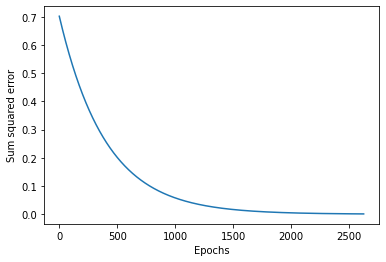

In [103]:
import matplotlib.pyplot as plt
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

#### Contour plots for $ \eta_{opt} $

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


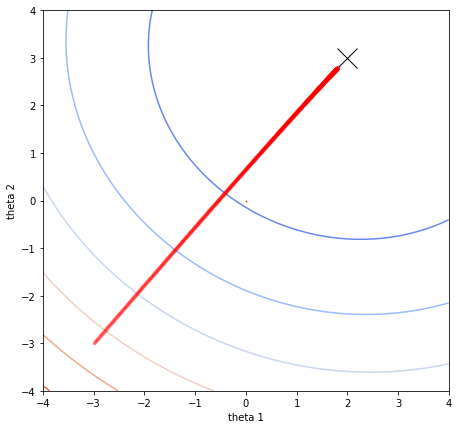

In [104]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-4,4,100),np.linspace(-4,4,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 1)
ax.plot(2,3, marker = 'x', color = 'black', markersize = 20)
ax.plot(iter_x,iter_y, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

#### Gradient descent with 
### $ \eta = \frac{0.9* \eta_{opt}}{2}  $

In [105]:
alpha= 0.45*(1/9.2173)
weights,cost,ep,err,iter_x1,iter_y1,iter_count1=linear_regression(x,y,alpha)

MSE: 0.7017775581314405
MSE: 0.7009892936799907
MSE: 0.7002019147906728
MSE: 0.6994154204684669
MSE: 0.6986298097194746
MSE: 0.6978450815509128
MSE: 0.6970612349711149
MSE: 0.6962782689895269
MSE: 0.6954961826167099
MSE: 0.6947149748643365
MSE: 0.69393464474519
MSE: 0.6931551912731609
MSE: 0.6923766134632503
MSE: 0.6915989103315654
MSE: 0.6908220808953197
MSE: 0.6900461241728307
MSE: 0.6892710391835176
MSE: 0.6884968249479043
MSE: 0.6877234804876128
MSE: 0.6869510048253663
MSE: 0.6861793969849842
MSE: 0.6854086559913862
MSE: 0.6846387808705847
MSE: 0.6838697706496872
MSE: 0.6831016243568968
MSE: 0.6823343410215046
MSE: 0.681567919673895
MSE: 0.6808023593455432
MSE: 0.6800376590690097
MSE: 0.6792738178779442
MSE: 0.6785108348070827
MSE: 0.6777487088922439
MSE: 0.6769874391703322
MSE: 0.676227024679332
MSE: 0.6754674644583116
MSE: 0.674708757547416
MSE: 0.6739509029878711
MSE: 0.6731938998219802
MSE: 0.6724377470931192
MSE: 0.6716824438457462
MSE: 0.6709279891253853
MSE: 0.67017438197863

MSE: 0.40280448720879997
MSE: 0.4023520860112228
MSE: 0.4019001930123119
MSE: 0.4014488076410978
MSE: 0.40099792932725237
MSE: 0.40054755750108895
MSE: 0.4000976915935601
MSE: 0.3996483310362586
MSE: 0.39919947526141586
MSE: 0.3987511237019
MSE: 0.3983032757912184
MSE: 0.3978559309635128
MSE: 0.3974090886535632
MSE: 0.39696274829678285
MSE: 0.39651690932922
MSE: 0.3960715711875569
MSE: 0.39562673330910864
MSE: 0.3951823951318227
MSE: 0.39473855609427666
MSE: 0.3942952156356817
MSE: 0.39385237319587674
MSE: 0.39341002821533144
MSE: 0.3929681801351432
MSE: 0.39252682839703895
MSE: 0.39208597244337107
MSE: 0.3916456117171198
MSE: 0.3912057456618915
MSE: 0.39076637372191625
MSE: 0.3903274953420502
MSE: 0.3898891099677727
MSE: 0.38945121704518654
MSE: 0.38901381602101526
MSE: 0.3885769063426066
MSE: 0.3881404874579276
MSE: 0.387704558815566
MSE: 0.3872691198647296
MSE: 0.38683417005524473
MSE: 0.3863997088375553
MSE: 0.38596573566272435
MSE: 0.38553224998242996
MSE: 0.3850992512489675
MSE: 

MSE: 0.2727405494335598
MSE: 0.27243424943657113
MSE: 0.2721282934953638
MSE: 0.2718226812234073
MSE: 0.2715174122346052
MSE: 0.2712124861432951
MSE: 0.27090790256424696
MSE: 0.27060366111266493
MSE: 0.2702997614041847
MSE: 0.26999620305487354
MSE: 0.2696929856812316
MSE: 0.26939010890018833
MSE: 0.2690875723291043
MSE: 0.2687853755857698
MSE: 0.2684835182884051
MSE: 0.26818200005565884
MSE: 0.2678808205066079
MSE: 0.26757997926075894
MSE: 0.2672794759380434
MSE: 0.266979310158822
MSE: 0.2666794815438812
MSE: 0.26637998971443333
MSE: 0.26608083429211676
MSE: 0.2657820148989951
MSE: 0.265483531157556
MSE: 0.2651853826907115
MSE: 0.26488756912179784
MSE: 0.26459009007457424
MSE: 0.2642929451732222
MSE: 0.2639961340423465
MSE: 0.26369965630697206
MSE: 0.26340351159254666
MSE: 0.2631076995249385
MSE: 0.26281221973043606
MSE: 0.26251707183574763
MSE: 0.262222255468001
MSE: 0.26192777025474334
MSE: 0.2616336158239391
MSE: 0.26133979180397293
MSE: 0.26104629782364425
MSE: 0.26075313351217205


MSE: 0.16229396708433114
MSE: 0.16211172269025512
MSE: 0.16192968298615693
MSE: 0.1617478477420951
MSE: 0.16156621672838598
MSE: 0.16138478971560472
MSE: 0.1612035664745835
MSE: 0.1610225467764128
MSE: 0.1608417303924397
MSE: 0.1606611170942683
MSE: 0.16048070665375916
MSE: 0.16030049884302944
MSE: 0.16012049343445242
MSE: 0.15994069020065696
MSE: 0.15976108891452678
MSE: 0.15958168934920208
MSE: 0.15940249127807662
MSE: 0.15922349447479997
MSE: 0.1590446987132749
MSE: 0.1588661037676589
MSE: 0.15868770941236307
MSE: 0.15850951542205194
MSE: 0.1583315215716431
MSE: 0.1581537276363072
MSE: 0.15797613339146716
MSE: 0.15779873861279894
MSE: 0.15762154307622966
MSE: 0.1574445465579387
MSE: 0.157267748834357
MSE: 0.15709114968216625
MSE: 0.15691474887829945
MSE: 0.15673854619994002
MSE: 0.15656254142452186
MSE: 0.15638673432972883
MSE: 0.15621112469349446
MSE: 0.15603571229400198
MSE: 0.15586049690968384
MSE: 0.15568547831922117
MSE: 0.15551065630154431
MSE: 0.15533603063583118
MSE: 0.15516

MSE: 0.09855115538595127
MSE: 0.0984405014726104
MSE: 0.09832997182992989
MSE: 0.09821956631831964
MSE: 0.09810928479834637
MSE: 0.09799912713073368
MSE: 0.09788909317636146
MSE: 0.09777918279626581
MSE: 0.09766939585163902
MSE: 0.09755973220382944
MSE: 0.09745019171434117
MSE: 0.09734077424483381
MSE: 0.09723147965712238
MSE: 0.09712230781317716
MSE: 0.09701325857512351
MSE: 0.09690433180524177
MSE: 0.09679552736596696
MSE: 0.09668684511988845
MSE: 0.0965782849297504
MSE: 0.0964698466584507
MSE: 0.09636153016904146
MSE: 0.09625333532472886
MSE: 0.09614526198887267
MSE: 0.09603731002498585
MSE: 0.09592947929673508
MSE: 0.09582176966793997
MSE: 0.09571418100257321
MSE: 0.09560671316476041
MSE: 0.09549936601877962
MSE: 0.09539213942906138
MSE: 0.09528503326018882
MSE: 0.09517804737689695
MSE: 0.09507118164407286
MSE: 0.09496443592675531
MSE: 0.09485781009013476
MSE: 0.0947513039995533
MSE: 0.09464491752050401
MSE: 0.09453865051863093
MSE: 0.0944325028597297
MSE: 0.09432647440974615
MSE: 

MSE: 0.06416407298266046
MSE: 0.06409203621295609
MSE: 0.06402008033774223
MSE: 0.06394820526615894
MSE: 0.06387641090744828
MSE: 0.06380469717095429
MSE: 0.06373306396612294
MSE: 0.06366151120250177
MSE: 0.0635900387897402
MSE: 0.06351864663758892
MSE: 0.06344733465589995
MSE: 0.06337610275462668
MSE: 0.06330495084382394
MSE: 0.06323387883364702
MSE: 0.06316288663435266
MSE: 0.06309197415629807
MSE: 0.06302114130994146
MSE: 0.06295038800584128
MSE: 0.06287971415465683
MSE: 0.06280911966714761
MSE: 0.06273860445417316
MSE: 0.0626681684266935
MSE: 0.06259781149576858
MSE: 0.06252753357255803
MSE: 0.06245733456832164
MSE: 0.062387214394418716
MSE: 0.06231717296230806
MSE: 0.062247210183548105
MSE: 0.06217732596979646
MSE: 0.06210752023281016
MSE: 0.06203779288444524
MSE: 0.061968143836656865
MSE: 0.06189857300149896
MSE: 0.06182908029112448
MSE: 0.061759665617784655
MSE: 0.06169032889382985
MSE: 0.06162107003170838
MSE: 0.061551888943967265
MSE: 0.061482785543251456
MSE: 0.06141375974230

MSE: 0.04057496501840494
MSE: 0.04052941673116946
MSE: 0.04048391958793869
MSE: 0.040438473531272896
MSE: 0.040393078503796954
MSE: 0.040347734448200306
MSE: 0.04030244130723655
MSE: 0.04025719902372365
MSE: 0.040212007540543854
MSE: 0.04016686680064365
MSE: 0.04012177674703338
MSE: 0.040076737322787624
MSE: 0.04003174847104476
MSE: 0.03998681013500713
MSE: 0.039941922257940875
MSE: 0.039897084783175794
MSE: 0.03985229765410543
MSE: 0.039807560814186835
MSE: 0.03976287420694062
MSE: 0.03971823777595085
MSE: 0.03967365146486491
MSE: 0.03962911521739358
MSE: 0.03958462897731077
MSE: 0.03954019268845355
MSE: 0.039495806294722186
MSE: 0.03945146974007987
MSE: 0.03940718296855275
MSE: 0.03936294592422986
MSE: 0.03931875855126302
MSE: 0.03927462079386692
MSE: 0.03923053259631868
MSE: 0.03918649390295815
MSE: 0.03914250465818768
MSE: 0.03909856480647214
MSE: 0.039054674292338665
MSE: 0.03901083306037676
MSE: 0.03896704105523827
MSE: 0.03892329822163702
MSE: 0.038879604504349026
MSE: 0.0388359

MSE: 0.025401395920038077
MSE: 0.025372884496858664
MSE: 0.025344405084433537
MSE: 0.025315957646814758
MSE: 0.02528754214809489
MSE: 0.02525915855240675
MSE: 0.025230806823923396
MSE: 0.025202486926858225
MSE: 0.025174198825464747
MSE: 0.025145942484036676
MSE: 0.02511771786690781
MSE: 0.025089524938452002
MSE: 0.025061363663083168
MSE: 0.025033234005255117
MSE: 0.025005135929461627
MSE: 0.024977069400236352
MSE: 0.024949034382152853
MSE: 0.024921030839824346
MSE: 0.024893058737903852
MSE: 0.024865118041084176
MSE: 0.024837208714097617
MSE: 0.024809330721716257
MSE: 0.024781484028751657
MSE: 0.02475366860005489
MSE: 0.02472588440051653
MSE: 0.024698131395066603
MSE: 0.02467040954867452
MSE: 0.024642718826349042
MSE: 0.0246150591931382
MSE: 0.024587430614129335
MSE: 0.024559833054448935
MSE: 0.024532266479262706
MSE: 0.02450473085377551
MSE: 0.024477226143231195
MSE: 0.024449752312912767
MSE: 0.024422309328142124
MSE: 0.024394897154280136
MSE: 0.024367515756726656
MSE: 0.02434016510092

MSE: 0.017222967687878482
MSE: 0.017203638075434975
MSE: 0.017184330163008087
MSE: 0.017165043926230788
MSE: 0.017145779340763376
MSE: 0.017126536382293597
MSE: 0.017107315026536313
MSE: 0.017088115249233857
MSE: 0.01706893702615568
MSE: 0.017049780333098525
MSE: 0.017030645145886224
MSE: 0.017011531440369914
MSE: 0.016992439192427645
MSE: 0.016973368377964794
MSE: 0.016954318972913586
MSE: 0.016935290953233425
MSE: 0.016916284294910648
MSE: 0.01689729897395857
MSE: 0.016878334966417483
MSE: 0.016859392248354567
MSE: 0.01684047079586383
MSE: 0.016821570585066194
MSE: 0.016802691592109408
MSE: 0.016783833793167956
MSE: 0.016764997164443105
MSE: 0.016746181682162898
MSE: 0.016727387322582027
MSE: 0.01670861406198179
MSE: 0.016689861876670268
MSE: 0.016671130742982064
MSE: 0.016652420637278394
MSE: 0.016633731535946956
MSE: 0.016615063415402045
MSE: 0.0165964162520844
MSE: 0.016577790022461278
MSE: 0.016559184703026288
MSE: 0.016540600270299508
MSE: 0.016522036700827324
MSE: 0.01650349397

MSE: 0.011483183116590585
MSE: 0.011470296861485605
MSE: 0.011457425071418363
MSE: 0.011444567730147476
MSE: 0.011431724821449735
MSE: 0.011418896329120189
MSE: 0.011406082236972072
MSE: 0.011393282528836812
MSE: 0.011380497188563989
MSE: 0.0113677262000213
MSE: 0.011354969547094595
MSE: 0.011342227213687793
MSE: 0.0113294991837229
MSE: 0.011316785441139985
MSE: 0.011304085969897112
MSE: 0.011291400753970442
MSE: 0.011278729777354073
MSE: 0.011266073024060082
MSE: 0.011253430478118505
MSE: 0.011240802123577308
MSE: 0.011228187944502416
MSE: 0.011215587924977587
MSE: 0.01120300204910449
MSE: 0.01119043030100263
MSE: 0.011177872664809373
MSE: 0.011165329124679865
MSE: 0.011152799664787076
MSE: 0.01114028426932173
MSE: 0.011127782922492328
MSE: 0.011115295608525096
MSE: 0.01110282231166394
MSE: 0.011090363016170519
MSE: 0.01107791770632412
MSE: 0.011065486366421726
MSE: 0.01105306898077792
MSE: 0.011040665533724923
MSE: 0.011028276009612535
MSE: 0.011015900392808132
MSE: 0.011003538667696

MSE: 0.007656631049793694
MSE: 0.0076480399519338535
MSE: 0.007639458496693499
MSE: 0.007630886673246839
MSE: 0.007622324470780253
MSE: 0.0076137718784922755
MSE: 0.007605228885593548
MSE: 0.007596695481306846
MSE: 0.007588171654867049
MSE: 0.007579657395521099
MSE: 0.007571152692528052
MSE: 0.00756265753515899
MSE: 0.007554171912697063
MSE: 0.007545695814437462
MSE: 0.007537229229687382
MSE: 0.007528772147766023
MSE: 0.007520324558004599
MSE: 0.0075118864497462955
MSE: 0.007503457812346258
MSE: 0.007495038635171598
MSE: 0.00748662890760135
MSE: 0.0074782286190265045
MSE: 0.007469837758849931
MSE: 0.007461456316486415
MSE: 0.007453084281362641
MSE: 0.007444721642917141
MSE: 0.007436368390600334
MSE: 0.007428024513874467
MSE: 0.007419690002213637
MSE: 0.007411364845103734
MSE: 0.007403049032042471
MSE: 0.007394742552539358
MSE: 0.007386445396115708
MSE: 0.007378157552304545
MSE: 0.007369879010650679
MSE: 0.007361609760710671
MSE: 0.007353349792052791
MSE: 0.007345099094257051
MSE: 0.007

MSE: 0.005128442151368311
MSE: 0.005122688538310153
MSE: 0.005116941382367394
MSE: 0.005111200676291332
MSE: 0.0051054664128413925
MSE: 0.00509973858478515
MSE: 0.005094017184898285
MSE: 0.005088302205964592
MSE: 0.005082593640775981
MSE: 0.005076891482132428
MSE: 0.005071195722842025
MSE: 0.005065506355720917
MSE: 0.005059823373593329
MSE: 0.0050541467692915495
MSE: 0.005048476535655881
MSE: 0.005042812665534708
MSE: 0.005037155151784423
MSE: 0.005031503987269434
MSE: 0.005025859164862174
MSE: 0.005020220677443082
MSE: 0.005014588517900581
MSE: 0.005008962679131079
MSE: 0.005003343154038975
MSE: 0.00499772993553662
MSE: 0.004992123016544325
MSE: 0.004986522389990363
MSE: 0.004980928048810926
MSE: 0.004975339985950157
MSE: 0.004969758194360121
MSE: 0.004964182667000789
MSE: 0.004958613396840028
MSE: 0.004953050376853623
MSE: 0.004947493600025235
MSE: 0.004941943059346397
MSE: 0.004936398747816525
MSE: 0.00493086065844289
MSE: 0.004925328784240604
MSE: 0.004919803118232646
MSE: 0.004914

MSE: 0.0034701092888804914
MSE: 0.0034662166768977066
MSE: 0.0034623284329815505
MSE: 0.0034584445522289464
MSE: 0.003454565029742346
MSE: 0.0034506898606296733
MSE: 0.003446819040004359
MSE: 0.003442952562985322
MSE: 0.0034390904246969518
MSE: 0.0034352326202691176
MSE: 0.0034313791448371696
MSE: 0.0034275299935418915
MSE: 0.0034236851615295455
MSE: 0.003419844643951832
MSE: 0.003416008435965904
MSE: 0.0034121765327343443
MSE: 0.0034083489294251747
MSE: 0.0034045256212118335
MSE: 0.003400706603273177
MSE: 0.0033968918707934855
MSE: 0.0033930814189624464
MSE: 0.003389275242975127
MSE: 0.0033854733380320173
MSE: 0.003381675699338975
MSE: 0.003377882322107256
MSE: 0.003374093201553475
MSE: 0.0033703083328996313
MSE: 0.0033665277113730883
MSE: 0.003362751332206567
MSE: 0.003358979190638127
MSE: 0.003355211281911204
MSE: 0.003351447601274538
MSE: 0.0033476881439822356
MSE: 0.003343932905293709
MSE: 0.0033401818804737076
MSE: 0.00333643506479229
MSE: 0.0033326924535248322
MSE: 0.00332895404

MSE: 0.0023428745313401798
MSE: 0.002340246766935022
MSE: 0.002337621950899219
MSE: 0.00233500007992364
MSE: 0.0023323811507028605
MSE: 0.002329765159935169
MSE: 0.002327152104322555
MSE: 0.0023245419805707286
MSE: 0.0023219347853890827
MSE: 0.002319330515490694
MSE: 0.0023167291675923636
MSE: 0.002314130738414544
MSE: 0.00231153522468139
MSE: 0.0023089426231207195
MSE: 0.002306352930464048
MSE: 0.0023037661434465325
MSE: 0.0023011822588070076
MSE: 0.002298601273287975
MSE: 0.0022960231836355836
MSE: 0.0022934479865996398
MSE: 0.002290875678933597
MSE: 0.0022883062573945566
MSE: 0.002285739718743255
MSE: 0.002283176059744074
MSE: 0.002280615277165019
MSE: 0.002278057367777733
MSE: 0.002275502328357472
MSE: 0.0022729501556831224
MSE: 0.002270400846537181
MSE: 0.002267854397705759
MSE: 0.002265310805978574
MSE: 0.0022627700681489503
MSE: 0.0022602321810138134
MSE: 0.0022576971413736766
MSE: 0.0022551649460326546
MSE: 0.002252635591798445
MSE: 0.0022501090754823336
MSE: 0.0022475853938991

MSE: 0.0015730509974184992
MSE: 0.0015712869286037899
MSE: 0.0015695248388297763
MSE: 0.0015677647258755057
MSE: 0.0015660065875225295
MSE: 0.0015642504215548738
MSE: 0.0015624962257590608
MSE: 0.001560743997924097
MSE: 0.0015589937358414755
MSE: 0.0015572454373051553
MSE: 0.0015554991001115888
MSE: 0.0015537547220596823
MSE: 0.0015520123009508402
MSE: 0.0015502718345889025
MSE: 0.0015485333207801988
MSE: 0.0015467967573335136
MSE: 0.001545062142060086
MSE: 0.0015433294727736206
MSE: 0.0015415987472902723
MSE: 0.0015398699634286428
MSE: 0.0015381431190097947
MSE: 0.0015364182118572246
MSE: 0.0015346952397968803
MSE: 0.001532974200657143
MSE: 0.0015312550922688343
MSE: 0.0015295379124652176
MSE: 0.001527822659081981
MSE: 0.0015261093299572409
MSE: 0.00152439792293155
MSE: 0.0015226884358478746
MSE: 0.0015209808665516045
MSE: 0.0015192752128905518
MSE: 0.0015175714727149476
MSE: 0.0015158696438774268
MSE: 0.0015141697242330395
MSE: 0.0015124717116392467
MSE: 0.001510775603955907
MSE: 0.0

MSE: 0.0010562410095958448
MSE: 0.0010550566934700017
MSE: 0.0010538737058014111
MSE: 0.0010526920450994054
MSE: 0.0010515117098749928
MSE: 0.0010503326986408574
MSE: 0.0010491550099113462
MSE: 0.001047978642202473
MSE: 0.0010468035940319226
MSE: 0.0010456298639190422
MSE: 0.0010444574503848368
MSE: 0.0010432863519519743
MSE: 0.0010421165671447843
MSE: 0.0010409480944892449
MSE: 0.0010397809325129982
MSE: 0.0010386150797453311
MSE: 0.0010374505347171827
MSE: 0.0010362872959611459
MSE: 0.001035125362011454
MSE: 0.001033964731403991
MSE: 0.0010328054026762822
MSE: 0.0010316473743674913
MSE: 0.0010304906450184267
MSE: 0.0010293352131715337
MSE: 0.0010281810773708922
MSE: 0.0010270282361622184
MSE: 0.0010258766880928557
MSE: 0.0010247264317117834
MSE: 0.0010235774655696047
MSE: 0.0010224297882185543
MSE: 0.0010212833982124918
MSE: 0.0010201382941068967
MSE: 0.0010189944744588735
MSE: 0.00101785193782714
MSE: 0.00101671068277204
MSE: 0.0010155707078555267
MSE: 0.0010144320116411702
MSE: 0.0

In [111]:
iter_count[-1],weights

(2627.0, array([[1.7984487 ],
        [2.78468953]]))

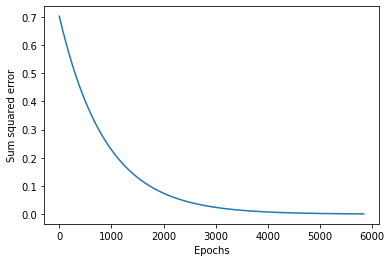

In [107]:
plt.figure(1)
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

#### contour plot for $ \eta = \frac{0.9* \eta_{opt}}{2} $ 

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


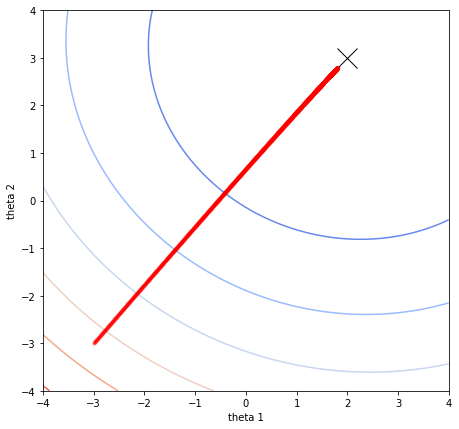

In [112]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-4,4,100),np.linspace(-4,4,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(2,3, marker = 'x', color = 'black', markersize = 20)



ax.plot(iter_x1,iter_y1, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

#### Gradient descent with 
### $ \eta = \frac{1.5* \eta_{opt}}{2}  $

In [113]:
alpha= 0.75*(1/9.2773)
weights,cost,ep,err,iter_x,iter_y,iter_count=linear_regression(x,y,alpha)
iter_count[-1]
weights

MSE: 0.7017775581314405
MSE: 0.700472521328984
MSE: 0.6991699118108337
MSE: 0.6978697250617226
MSE: 0.6965719565747895
MSE: 0.695276601851551
MSE: 0.6939836564019002
MSE: 0.6926931157440767
MSE: 0.6914049754046636
MSE: 0.6901192309185639
MSE: 0.6888358778289901
MSE: 0.6875549116874424
MSE: 0.6862763280537005
MSE: 0.6850001224958043
MSE: 0.68372629059004
MSE: 0.682454827920919
MSE: 0.6811857300811743
MSE: 0.6799189926717335
MSE: 0.6786546113017111
MSE: 0.6773925815883887
MSE: 0.6761328991572045
MSE: 0.6748755596417311
MSE: 0.6736205586836695
MSE: 0.6723678919328248
MSE: 0.6711175550470979
MSE: 0.6698695436924667
MSE: 0.6686238535429742
MSE: 0.6673804802807074
MSE: 0.6661394195957929
MSE: 0.6649006671863701
MSE: 0.6636642187585842
MSE: 0.6624300700265677
MSE: 0.6611982167124291
MSE: 0.6599686545462312
MSE: 0.6587413792659861
MSE: 0.6575163866176319
MSE: 0.6562936723550206
MSE: 0.655073232239906
MSE: 0.6538550620419257
MSE: 0.6526391575385887
MSE: 0.6514255145152573
MSE: 0.650214128765138

MSE: 0.28087469429393846
MSE: 0.2803524626383243
MSE: 0.27983120215885626
MSE: 0.27931091104916783
MSE: 0.27879158750625277
MSE: 0.27827322973045815
MSE: 0.27775583592548075
MSE: 0.2772394042983566
MSE: 0.2767239330594584
MSE: 0.2762094204224878
MSE: 0.27569586460446943
MSE: 0.2751832638257445
MSE: 0.2746716163099652
MSE: 0.27416092028408773
MSE: 0.2736511739783663
MSE: 0.2731423756263488
MSE: 0.2726345234648674
MSE: 0.2721276157340347
MSE: 0.2716216506772382
MSE: 0.27111662654113095
MSE: 0.27061254157563014
MSE: 0.270109394033907
MSE: 0.26960718217238244
MSE: 0.2691059042507208
MSE: 0.2686055585318245
MSE: 0.2681061432818266
MSE: 0.26760765677008647
MSE: 0.26711009726918195
MSE: 0.26661346305490474
MSE: 0.26611775240625435
MSE: 0.2656229636054309
MSE: 0.26512909493783055
MSE: 0.2646361446920391
MSE: 0.26414411115982595
MSE: 0.263652992636138
MSE: 0.26316278741909366
MSE: 0.2626734938099786
MSE: 0.26218511011323664
MSE: 0.26169763463646684
MSE: 0.2612110656904165
MSE: 0.260725401588975

MSE: 0.113907724103225
MSE: 0.11369597433899493
MSE: 0.11348461829488338
MSE: 0.11327365523868252
MSE: 0.11306308443954566
MSE: 0.11285290516798588
MSE: 0.11264311669587306
MSE: 0.11243371829643169
MSE: 0.11222470924423719
MSE: 0.11201608881521548
MSE: 0.11180785628663858
MSE: 0.11160001093712284
MSE: 0.11139255204662626
MSE: 0.11118547889644662
MSE: 0.11097879076921816
MSE: 0.11077248694890943
MSE: 0.1105665667208209
MSE: 0.11036102937158247
MSE: 0.1101558741891507
MSE: 0.10995110046280679
MSE: 0.1097467074831537
MSE: 0.10954269454211385
MSE: 0.10933906093292689
MSE: 0.10913580595014723
MSE: 0.10893292888964064
MSE: 0.10873042904858356
MSE: 0.10852830572545909
MSE: 0.1083265582200553
MSE: 0.1081251858334626
MSE: 0.10792418786807144
MSE: 0.10772356362757005
MSE: 0.10752331241694144
MSE: 0.1073234335424615
MSE: 0.10712392631169664
MSE: 0.1069247900335008
MSE: 0.10672602401801388
MSE: 0.10652762757665854
MSE: 0.1063296000221385
MSE: 0.10613194066843588
MSE: 0.10593464883080841
MSE: 0.105

MSE: 0.054624229162874106
MSE: 0.054522702112810004
MSE: 0.05442136381093392
MSE: 0.054320213906271946
MSE: 0.05421925204850342
MSE: 0.05411847788795867
MSE: 0.0540178910756188
MSE: 0.053917491263113515
MSE: 0.05381727810272086
MSE: 0.053717251247365476
MSE: 0.05361741035061745
MSE: 0.05351775506669107
MSE: 0.053418285050443916
MSE: 0.053318999957375296
MSE: 0.053219899443625505
MSE: 0.053120983165973856
MSE: 0.05302225078183845
MSE: 0.05292370194927437
MSE: 0.05282533632697268
MSE: 0.052727153574258986
MSE: 0.05262915335109282
MSE: 0.05253133531806593
MSE: 0.05243369913640143
MSE: 0.05233624446795237
MSE: 0.05223897097520064
MSE: 0.052141878321256004
MSE: 0.05204496616985476
MSE: 0.051948234185358405
MSE: 0.051851682032752866
MSE: 0.051755309377647135
MSE: 0.051659115886272
MSE: 0.051563101225478906
MSE: 0.05146726506273914
MSE: 0.051371607066142196
MSE: 0.051276126904394974
MSE: 0.051180824246820494
MSE: 0.051085698763356883
MSE: 0.05099075012455585
MSE: 0.050895978001582035
MSE: 0.0

MSE: 0.02400534296914325
MSE: 0.023960734895975996
MSE: 0.023916209738274973
MSE: 0.02387176734188472
MSE: 0.023827407552936476
MSE: 0.02378313021784757
MSE: 0.023738935183320944
MSE: 0.02369482229634469
MSE: 0.02365079140419124
MSE: 0.023606842354417297
MSE: 0.023562974994862866
MSE: 0.023519189173650874
MSE: 0.023475484739186835
MSE: 0.02343186154015797
MSE: 0.023388319425533002
MSE: 0.02334485824456146
MSE: 0.023301477846773267
MSE: 0.023258178081978068
MSE: 0.023214958800264796
MSE: 0.02317181985200121
MSE: 0.023128761087833297
MSE: 0.02308578235868475
MSE: 0.02304288351575655
MSE: 0.023000064410526308
MSE: 0.02295732489474776
MSE: 0.022914664820450445
MSE: 0.022872084039939053
MSE: 0.022829582405792817
MSE: 0.022787159770865165
MSE: 0.022744815988283193
MSE: 0.022702550911447
MSE: 0.02266036439402942
MSE: 0.022618256289975297
MSE: 0.022576226453501214
MSE: 0.022534274739094595
MSE: 0.02249240100151367
MSE: 0.022450605095786672
MSE: 0.022408886877211428
MSE: 0.022367246201354836
MS

MSE: 0.012018273331262857
MSE: 0.011995944646372363
MSE: 0.011973657458016495
MSE: 0.011951411689056765
MSE: 0.011929207262498045
MSE: 0.011907044101488382
MSE: 0.011884922129318722
MSE: 0.011862841269422624
MSE: 0.011840801445376036
MSE: 0.011818802580896983
MSE: 0.011796844599845348
MSE: 0.011774927426222532
MSE: 0.011753050984171277
MSE: 0.011731215197975386
MSE: 0.011709419992059402
MSE: 0.011687665290988393
MSE: 0.011665951019467734
MSE: 0.011644277102342743
MSE: 0.01162264346459847
MSE: 0.011601050031359477
MSE: 0.011579496727889549
MSE: 0.011557983479591387
MSE: 0.011536510212006398
MSE: 0.011515076850814486
MSE: 0.011493683321833661
MSE: 0.01147232955101994
MSE: 0.011451015464466929
MSE: 0.011429740988405735
MSE: 0.011408506049204539
MSE: 0.011387310573368493
MSE: 0.011366154487539354
MSE: 0.011345037718495307
MSE: 0.01132396019315067
MSE: 0.011302921838555646
MSE: 0.011281922581896052
MSE: 0.011260962350493106
MSE: 0.011240041071803208
MSE: 0.011219158673417549
MSE: 0.01119831

MSE: 0.005819737589127874
MSE: 0.005808927549352725
MSE: 0.005798137595487755
MSE: 0.005787367690201273
MSE: 0.005776617796230997
MSE: 0.005765887876383892
MSE: 0.005755177893536084
MSE: 0.005744487810632727
MSE: 0.005733817590687824
MSE: 0.0057231671967841805
MSE: 0.005712536592073195
MSE: 0.005701925739774804
MSE: 0.005691334603177285
MSE: 0.005680763145637192
MSE: 0.005670211330579189
MSE: 0.005659679121495938
MSE: 0.005649166481947973
MSE: 0.005638673375563548
MSE: 0.0056281997660385715
MSE: 0.005617745617136416
MSE: 0.00560731089268783
MSE: 0.0055968955565907945
MSE: 0.005586499572810414
MSE: 0.005576122905378776
MSE: 0.005565765518394842
MSE: 0.005555427376024302
MSE: 0.005545108442499482
MSE: 0.005534808682119184
MSE: 0.005524528059248594
MSE: 0.005514266538319132
MSE: 0.005504024083828345
MSE: 0.005493800660339787
MSE: 0.0054835962324828735
MSE: 0.005473410764952804
MSE: 0.005463244222510377
MSE: 0.005453096569981936
MSE: 0.005442967772259163
MSE: 0.0054328577942990685
MSE: 0.0

MSE: 0.0032342697540059377
MSE: 0.003228263352541422
MSE: 0.003222268109530328
MSE: 0.003216284004236633
MSE: 0.0032103110159628716
MSE: 0.0032043491240500415
MSE: 0.00319839830787753
MSE: 0.0031924585468630804
MSE: 0.0031865298204626735
MSE: 0.0031806121081704775
MSE: 0.0031747053895187986
MSE: 0.00316880964407796
MSE: 0.003162924851456282
MSE: 0.003157050991299975
MSE: 0.0031511880432930905
MSE: 0.003145335987157441
MSE: 0.003139494802652533
MSE: 0.0031336644695755004
MSE: 0.0031278449677610187
MSE: 0.003122036277081254
MSE: 0.003116238377445789
MSE: 0.0031104512488015473
MSE: 0.003104674871132721
MSE: 0.0030989092244607234
MSE: 0.0030931542888440857
MSE: 0.003087410044378419
MSE: 0.0030816764711963252
MSE: 0.0030759535494673394
MSE: 0.0030702412593978617
MSE: 0.0030645395812310687
MSE: 0.0030588484952468803
MSE: 0.0030531679817618596
MSE: 0.0030474980211291592
MSE: 0.0030418385937384606
MSE: 0.00303618968001588
MSE: 0.0030305512604239314
MSE: 0.003024923315461436
MSE: 0.003019305825

MSE: 0.0015637586406760174
MSE: 0.001560855338617984
MSE: 0.001557957428950011
MSE: 0.0015550649016533107
MSE: 0.001552177746727714
MSE: 0.0015492959541916352
MSE: 0.0015464195140820374
MSE: 0.0015435484164544086
MSE: 0.0015406826513827056
MSE: 0.001537822208959344
MSE: 0.0015349670792951509
MSE: 0.0015321172525193242
MSE: 0.0015292727187794118
MSE: 0.0015264334682412767
MSE: 0.001523599491089051
MSE: 0.0015207707775251092
MSE: 0.0015179473177700442
MSE: 0.0015151291020626151
MSE: 0.0015123161206597228
MSE: 0.0015095083638363737
MSE: 0.001506705821885652
MSE: 0.0015039084851186848
MSE: 0.0015011163438646
MSE: 0.001498329388470499
MSE: 0.001495547609301425
MSE: 0.001492770996740326
MSE: 0.001489999541188024
MSE: 0.001487233233063181
MSE: 0.0014844720628022676
MSE: 0.0014817160208595171
MSE: 0.0014789650977069203
MSE: 0.001476219283834161
MSE: 0.0014734785697486038
MSE: 0.0014707429459752583
MSE: 0.0014680124030567363
MSE: 0.0014652869315532266
MSE: 0.0014625665220424672
MSE: 0.001459851

array([[1.79856525],
       [2.78482457]])

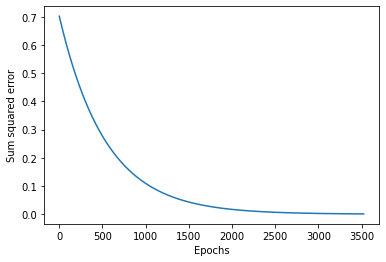

In [115]:
plt.figure(1)
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


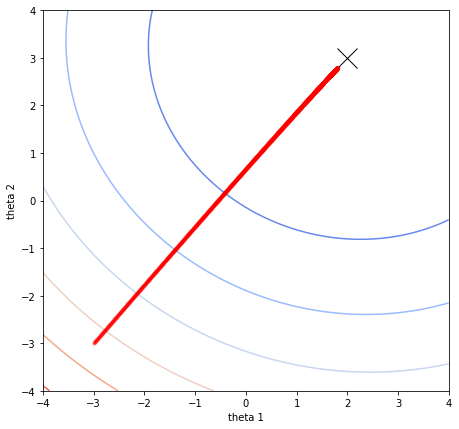

In [114]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-4,4,100),np.linspace(-4,4,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(2,3, marker = 'x', color = 'black', markersize = 20)



ax.plot(iter_x1,iter_y1, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

#### Gradient descent with 
### $ \eta = 1.5* \eta_{opt}  $

In [116]:
alpha= 1.5*(1/9.2173)
weights,cost,ep,err,iter_x,iter_y,iter_count=linear_regression(x,y,alpha)
iter_count[-1],weights

MSE: 0.7017775581314405
MSE: 0.6991517328543665
MSE: 0.6965357342551247
MSE: 0.693929525553668
MSE: 0.6913330701076329
MSE: 0.6887463314118185
MSE: 0.6861692730976773
MSE: 0.6836018589328019
MSE: 0.6810440528204169
MSE: 0.6784958187988676
MSE: 0.6759571210411189
MSE: 0.673427923854247
MSE: 0.670908191678939
MSE: 0.6683978890889941
MSE: 0.6658969807908234
MSE: 0.6634054316229525
MSE: 0.6609232065555313
MSE: 0.6584502706898371
MSE: 0.6559865892577832
MSE: 0.6535321276214341
MSE: 0.6510868512725143
MSE: 0.6486507258319243
MSE: 0.6462237170492574
MSE: 0.6438057908023171
MSE: 0.6413969130966379
MSE: 0.6389970500650068
MSE: 0.6366061679669862
MSE: 0.6342242331884395
MSE: 0.6318512122410611
MSE: 0.6294870717618992
MSE: 0.6271317785128926
MSE: 0.6247852993804012
MSE: 0.6224476013747376
MSE: 0.6201186516297065
MSE: 0.6177984174021405
MSE: 0.6154868660714403
MSE: 0.613183965139117
MSE: 0.6108896822283307
MSE: 0.6086039850834398
MSE: 0.6063268415695455
MSE: 0.6040582196720385
MSE: 0.6017980874961

MSE: 0.1057270647932723
MSE: 0.10533161452155802
MSE: 0.10493764367623781
MSE: 0.1045451467215424
MSE: 0.10415411814242015
MSE: 0.10376455244445867
MSE: 0.10337644415380884
MSE: 0.10298978781710658
MSE: 0.10260457800139694
MSE: 0.1022208092940578
MSE: 0.10183847630272297
MSE: 0.10145757365520733
MSE: 0.10107809599943046
MSE: 0.10070003800334212
MSE: 0.10032339435484669
MSE: 0.09994815976172867
MSE: 0.09957432895157849
MSE: 0.09920189667171833
MSE: 0.09883085768912774
MSE: 0.09846120679037075
MSE: 0.09809293878152196
MSE: 0.09772604848809449
MSE: 0.09736053075496587
MSE: 0.09699638044630668
MSE: 0.09663359244550758
MSE: 0.096272161655108
MSE: 0.0959120829967238
MSE: 0.09555335141097666
MSE: 0.09519596185742252
MSE: 0.09483990931448019
MSE: 0.09448518877936161
MSE: 0.09413179526800128
MSE: 0.0937797238149857
MSE: 0.09342896947348418
MSE: 0.09307952731517923
MSE: 0.09273139243019654
MSE: 0.09238455992703684
MSE: 0.09203902493250662
MSE: 0.09169478259164977
MSE: 0.09135182806767936
MSE: 0.

MSE: 0.029027267842771428
MSE: 0.028918731138303132
MSE: 0.02881060037274875
MSE: 0.028702874027508388
MSE: 0.028595550589664242
MSE: 0.028488628551959317
MSE: 0.028382106412776494
MSE: 0.02827598267611702
MSE: 0.02817025585157984
MSE: 0.028064924454340473
MSE: 0.027959987005130183
MSE: 0.027855442030215078
MSE: 0.02775128806137566
MSE: 0.02764752363588596
MSE: 0.027544147296493036
MSE: 0.027441157591396398
MSE: 0.027338553074227997
MSE: 0.027236332304031278
MSE: 0.02713449384524149
MSE: 0.02703303626766512
MSE: 0.026931958146460058
MSE: 0.026831258062115455
MSE: 0.026730934600431636
MSE: 0.02663098635250054
MSE: 0.026531411914685655
MSE: 0.026432209888602367
MSE: 0.02633337888109834
MSE: 0.026234917504233943
MSE: 0.02613682437526264
MSE: 0.02603909811661165
MSE: 0.025941737355862582
MSE: 0.025844740725732177
MSE: 0.025748106864052853
MSE: 0.025651834413754012
MSE: 0.025555922022842473
MSE: 0.02546036834438378
MSE: 0.025365172036483224
MSE: 0.02527033176226696
MSE: 0.025175846189863092

MSE: 0.00872266774109051
MSE: 0.008690063687946925
MSE: 0.008657581541305737
MSE: 0.008625220845237426
MSE: 0.008592981145518009
MSE: 0.008560861989622722
MSE: 0.008528862926719581
MSE: 0.008496983507663146
MSE: 0.00846522328498814
MSE: 0.00843358181290318
MSE: 0.008402058647284508
MSE: 0.00837065334566979
MSE: 0.00833936546725186
MSE: 0.00830819457287253
MSE: 0.008277140225016409
MSE: 0.00824620198780481
MSE: 0.008215379426989597
MSE: 0.008184672109947035
MSE: 0.0081540796056718
MSE: 0.00812360148477086
MSE: 0.008093237319457467
MSE: 0.008062986683545123
MSE: 0.008032849152441618
MSE: 0.008002824303143084
MSE: 0.007972911714228014
MSE: 0.007943110965851357
MSE: 0.007913421639738577
MSE: 0.007883843319179868
MSE: 0.007854375589024234
MSE: 0.00782501803567366
MSE: 0.007795770247077315
MSE: 0.007766631812725766
MSE: 0.007737602323645181
MSE: 0.007708681372391647
MSE: 0.007679868553045404
MSE: 0.007651163461205088
MSE: 0.007622565693982158
MSE: 0.007594074849995189
MSE: 0.0075656905293642

MSE: 0.0017307902527365039
MSE: 0.0017243243868497041
MSE: 0.0017178826852092851
MSE: 0.0017114650574788501
MSE: 0.0017050714136598263
MSE: 0.0016987016640901906
MSE: 0.0016923557194431997
MSE: 0.001686033490726162
MSE: 0.0016797348892791555
MSE: 0.0016734598267738182
MSE: 0.0016672082152120774
MSE: 0.0016609799669249348
MSE: 0.0016547749945712265
MSE: 0.001648593211136391
MSE: 0.0016424345299312665
MSE: 0.0016362988645908488
MSE: 0.001630186129073105
MSE: 0.0016240962376577464
MSE: 0.00161802910494503
MSE: 0.0016119846458545648
MSE: 0.0016059627756241151
MSE: 0.0015999634098083956
MSE: 0.0015939864642779114
MSE: 0.001588031855217765
MSE: 0.0015820994991264706
MSE: 0.0015761893128147962
MSE: 0.0015703012134045866
MSE: 0.0015644351183276063
MSE: 0.0015585909453243742
MSE: 0.0015527686124430099
MSE: 0.001546968038038086
MSE: 0.0015411891407694867
MSE: 0.0015354318396012478
MSE: 0.0015296960538004431
MSE: 0.0015239817029360312
MSE: 0.0015182887068777326
MSE: 0.0015126169857949102
MSE: 0.0

(1751.0, array([[1.79882495],
        [2.78512711]]))

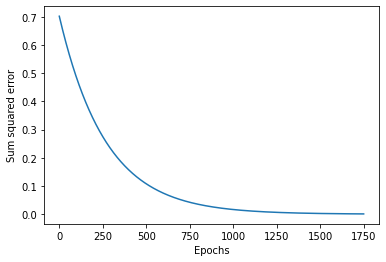

In [117]:
plt.figure(1)
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


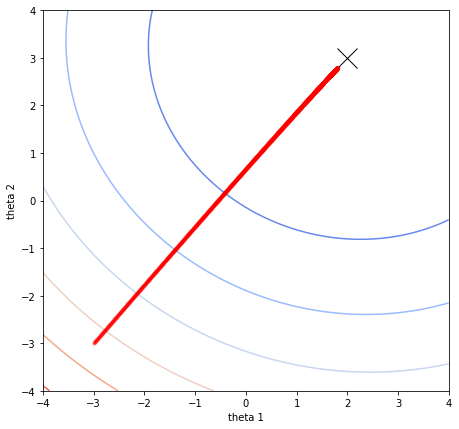

In [118]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-4,4,100),np.linspace(-4,4,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(2,3, marker = 'x', color = 'black', markersize = 20)



ax.plot(iter_x1,iter_y1, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()